# Importing all required modules

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import os

## for statistical tests
import scipy
from scipy.stats import f_oneway
 
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 20,15

# Importing Data
* We are using Pandas and Numpy for Data manupulation
* 'na_values' attribute in Pandas.read_csv function is used to replace '?' with NULL values

In [2]:
# Import Data
input_filename = 'kidneyChronic.csv'
input_filepath = os.getcwd()+"/"+input_filename
# Replacing 
Base_df = pd.read_csv(input_filepath,index_col=False,na_values=['?'])
Base_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


## Replace any escaped, literal and whitespaces character as per data analysis done in later portion of code 

In [3]:
# handle escaped , literal and whitespaces as per data analysis done below
Base_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r",'(^\s+|\s+$)','\t'], value=['','','',''], regex=True, inplace=True)
Base_df.replace("?",np.nan,inplace =True)


## Creating the numerical verison of class variable for easy analysis

In [4]:
Base_df['class_num'] =  np.where(Base_df["class"]=='ckd',1,0)

In [5]:
print('Total Rows: ',Base_df.shape[0])
print('CKD Events: ', Base_df['class_num'].sum())
print('Event Rate: ', Base_df['class_num'].sum()/Base_df.shape[0])

Total Rows:  400
CKD Events:  250
Event Rate:  0.625


## Creating a dictionary for field names and their descriptions/elaborated names for easy understanding

In [6]:
# Creating dict for field names and elaboration
Attributes_Description = { 'age' :'age' , 'bp' :'blood pressure' , 'sg' :'specific gravity' , 'al' :'albumin' , 'su' :'sugar' , 'rbc' :'red blood cells' , 'pc' :'pus cell' , 'pcc' :'pus cell clumps' , 'ba' :'bacteria' , 'bgr' :'blood glucose random' , 'bu' :'blood urea' , 'sc' :'serum creatinine' , 'sod' :'sodium' , 'pot' :'potassium' , 'hemo' :'hemoglobin' , 'pcv' :'packed cell volume' , 'wbcc' :'white blood cell count' , 'rbcc' :'red blood cell count' , 'htn' :'hypertension' , 'dm' :'diabetes mellitus' , 'cad' :'coronary artery disease' , 'appet' :'appetite' , 'pe' :'pedal edema' , 'ane' :'anemia' , 'class' :'class'}


Attributes_Description

{'age': 'age',
 'bp': 'blood pressure',
 'sg': 'specific gravity',
 'al': 'albumin',
 'su': 'sugar',
 'rbc': 'red blood cells',
 'pc': 'pus cell',
 'pcc': 'pus cell clumps',
 'ba': 'bacteria',
 'bgr': 'blood glucose random',
 'bu': 'blood urea',
 'sc': 'serum creatinine',
 'sod': 'sodium',
 'pot': 'potassium',
 'hemo': 'hemoglobin',
 'pcv': 'packed cell volume',
 'wbcc': 'white blood cell count',
 'rbcc': 'red blood cell count',
 'htn': 'hypertension',
 'dm': 'diabetes mellitus',
 'cad': 'coronary artery disease',
 'appet': 'appetite',
 'pe': 'pedal edema',
 'ane': 'anemia',
 'class': 'class'}

## Checking the missing value percentage for each attribute

In [7]:
for i in (Base_df.columns):
    # count number of rows with missing values
    n_miss = Base_df[[i]].isnull().sum()
    perc = n_miss / Base_df.shape[0] * 100
    print('> %s , Missing: %d (%.1f%%)' % (i, n_miss, perc))

> age , Missing: 9 (2.2%)
> bp , Missing: 12 (3.0%)
> sg , Missing: 47 (11.8%)
> al , Missing: 46 (11.5%)
> su , Missing: 49 (12.2%)
> rbc , Missing: 152 (38.0%)
> pc , Missing: 65 (16.2%)
> pcc , Missing: 4 (1.0%)
> ba , Missing: 4 (1.0%)
> bgr , Missing: 44 (11.0%)
> bu , Missing: 19 (4.8%)
> sc , Missing: 17 (4.2%)
> sod , Missing: 87 (21.8%)
> pot , Missing: 88 (22.0%)
> hemo , Missing: 52 (13.0%)
> pcv , Missing: 71 (17.8%)
> wbcc , Missing: 106 (26.5%)
> rbcc , Missing: 131 (32.8%)
> htn , Missing: 2 (0.5%)
> dm , Missing: 2 (0.5%)
> cad , Missing: 2 (0.5%)
> appet , Missing: 1 (0.2%)
> pe , Missing: 1 (0.2%)
> ane , Missing: 1 (0.2%)
> class , Missing: 0 (0.0%)
> class_num , Missing: 0 (0.0%)


## Checking the data types and value counts for each fields

In [8]:
Base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        391 non-null    float64
 1   bp         388 non-null    float64
 2   sg         353 non-null    float64
 3   al         354 non-null    float64
 4   su         351 non-null    float64
 5   rbc        248 non-null    object 
 6   pc         335 non-null    object 
 7   pcc        396 non-null    object 
 8   ba         396 non-null    object 
 9   bgr        356 non-null    float64
 10  bu         381 non-null    float64
 11  sc         383 non-null    float64
 12  sod        313 non-null    float64
 13  pot        312 non-null    float64
 14  hemo       348 non-null    float64
 15  pcv        329 non-null    object 
 16  wbcc       294 non-null    object 
 17  rbcc       269 non-null    object 
 18  htn        398 non-null    object 
 19  dm         398 non-null    object 
 20  cad       

## Basic EDA for numerical columns

In [9]:
Base_df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,class_num
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000


## Basic EDA for categorical columns

In [10]:
Base_df.describe(include=['O'])

,rbc,pc,pcc,ba,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,248,335,396,396,329,294,269,398,398,398,399,399,399,400
unique,2,2,2,2,42,89,45,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,261,364,317,323,339,250


## Bifurcating different column types as lists for easy combined operations

In [11]:
#Making list of different types of columns
Target = 'class_num'
nominal_col =['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

numerical_col = ['age', 'bp','bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

## Analysing Distinct values and counts in categorical columns

In [12]:
# Printing distinct values of Nominal fields 
for i in nominal_col:
    print('-'*100)
    print(Attributes_Description[i])
    print('-'*100)
    print(Base_df[i].value_counts())

----------------------------------------------------------------------------------------------------
specific gravity
----------------------------------------------------------------------------------------------------
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
----------------------------------------------------------------------------------------------------
albumin
----------------------------------------------------------------------------------------------------
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64
----------------------------------------------------------------------------------------------------
sugar
----------------------------------------------------------------------------------------------------
0.0    290
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: su, dtype: int64
-------------------------------------------------------------------------------------------------

## Analysing the event rate in each category in detail

In [13]:
for i in nominal_col: 
    temp = Base_df[[i, Target]].fillna('NA').groupby([i], as_index=False).sum().sort_values(by=Target, ascending=False)
    temp1 = pd.DataFrame(Base_df[i].fillna('NA').value_counts() )
    temp1.columns = [i+'_value_count']
    temp.rename(columns = {'class_num': i+'_target_count'},inplace = True)
    temp = temp.merge(temp1, left_on=  temp[i] ,right_on=temp1.index).drop(columns='key_0')
    temp[i+'_target_%'] = temp[i+'_target_count']/temp[i+'_value_count']
    temp = temp[[i,i+'_value_count',i+'_target_count',i+'_target_%']]
    print('-'*100)
    print(Attributes_Description[i])
    print('-'*100)
    print(temp)
    print('*'*100)
    print(' '*100)

----------------------------------------------------------------------------------------------------
specific gravity
----------------------------------------------------------------------------------------------------
      sg  sg_value_count  sg_target_count  sg_target_%
0   1.01              84               84     1.000000
1  1.015              75               75     1.000000
2     NA              47               42     0.893617
3   1.02             106               31     0.292453
4  1.025              81               11     0.135802
5  1.005               7                7     1.000000
****************************************************************************************************
                                                                                                    
----------------------------------------------------------------------------------------------------
albumin
-------------------------------------------------------------------------------------

## Performed missing value treatment for Nominal Attrinutes as per above analysis 
### Following methods are used for missing value treatment
* Mode value treatment
* Constant value treatment

I referred following blog for the topic [Link](https://machinelearningmastery.com/handle-missing-data-python/
"optional title")

In [14]:
# Missing value treatment for Nominal Attrinutes as per above analysis 

# Mode Treatment field names - pcc,ba,dm,cad,appet,pe
# Constant value treatment field names - al,su,rbc,pc,sg

mis_val_dict = {'sg': 'Novalue','al':0,'su':0,'rbc':'Novalue',
                'pc':'Novalue','pcc':'Novalue','ba':'Novalue','htn':'no',
                'dm':'no','cad':'no','appet':'good','pe':'no','ane':'no'}


for i in nominal_col:
    Base_df[i] = Base_df[i].fillna(mis_val_dict[i])


## Error handling by converting all numerical fields as float

In [15]:
for i in numerical_col:
    Base_df[i] = Base_df[i].astype(float)

## EDA for numerical attributes by checking mean value in each class

In [16]:
for i in numerical_col:
    print('-'*100)
    print(Attributes_Description[i])
    print('-'*100)
    print(Base_df.pivot_table(values=i,index=[Target],aggfunc=np.mean))
    print('*'*100)
    print(' '*100)
    

----------------------------------------------------------------------------------------------------
age
----------------------------------------------------------------------------------------------------
                 age
class_num           
0          46.516779
1          54.541322
****************************************************************************************************
                                                                                                    
----------------------------------------------------------------------------------------------------
blood pressure
----------------------------------------------------------------------------------------------------
                  bp
class_num           
0          71.351351
1          79.625000
****************************************************************************************************
                                                                                                    
-----

## Visualising the numerical attributes for better understanding of data

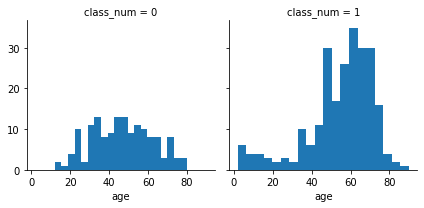

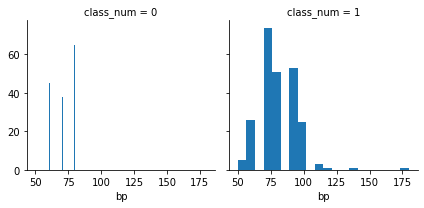

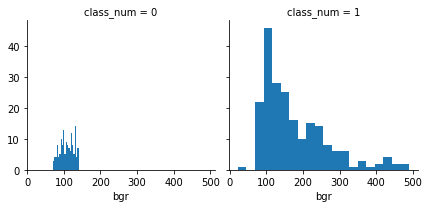

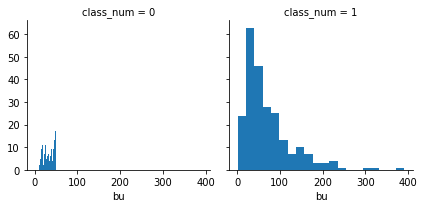

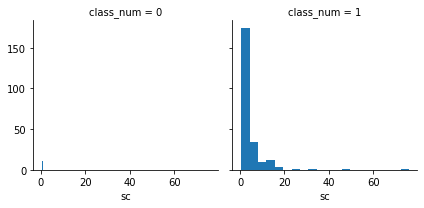

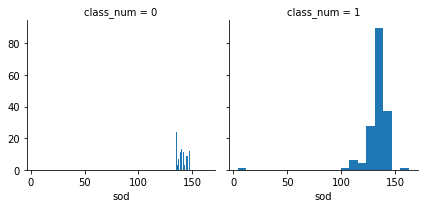

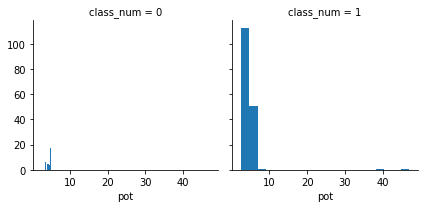

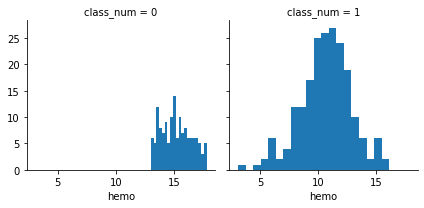

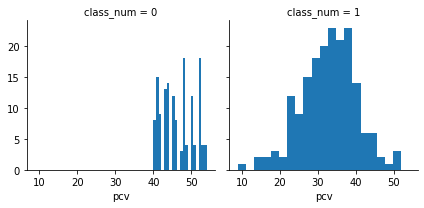

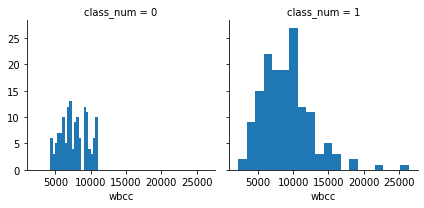

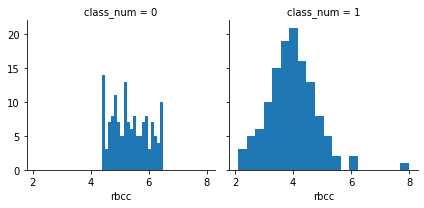

In [17]:
for i in numerical_col:
    g = sns.FacetGrid(Base_df, col=Target)
    g.map(plt.hist, i, bins=20)

## Anlysing missing values counts for numerical attributes

In [18]:
Base_df[numerical_col].isnull().sum()

age       9
bp       12
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wbcc    106
rbcc    131
dtype: int64

## Analysing numerical data by binning values

In [19]:
for i in numerical_col:
    Base_df['Band'] = pd.cut(Base_df[i].round(-1), 11)
    temp = Base_df[['Band', Target]].groupby(['Band'], as_index=False).agg(
        count=(Target, 'count'), sum=(Target, sum),mean = (Target, np.average)).sort_values(by='Band', ascending=True)

    print('-'*100)
    print(Attributes_Description[i])
    print('-'*100)
    print(temp)
    print('*'*100)
    print(' '*100)
Base_df.drop(['Band'], axis=1,inplace = True)

----------------------------------------------------------------------------------------------------
age
----------------------------------------------------------------------------------------------------
                Band  count  sum      mean
0     (-0.09, 8.182]      5    5  1.000000
1    (8.182, 16.364]      9    8  0.888889
2   (16.364, 24.545]     23    7  0.304348
3   (24.545, 32.727]     32   10  0.312500
4   (32.727, 40.909]     55   21  0.381818
5   (40.909, 49.091]      0    0       NaN
6   (49.091, 57.273]     71   47  0.661972
7   (57.273, 65.455]    115   82  0.713043
8   (65.455, 73.636]     61   47  0.770492
9   (73.636, 81.818]     19   14  0.736842
10    (81.818, 90.0]      1    1  1.000000
****************************************************************************************************
                                                                                                    
----------------------------------------------------------------------------

In [20]:
# Making the list of target columns for excluding these while modelling
Target_cols = ['class','class_num']

## Train Test Split 

In [21]:
from sklearn import model_selection
train, test = model_selection.train_test_split(Base_df, 
                      test_size=0.3)

## print info
print("X_train shape:", train.drop(Target_cols,axis=1).shape, "\nX_test shape:", test.drop(Target_cols,axis=1).shape)
print("y_train mean:", round(np.mean(train[Target_cols]),2), "\ny_test mean:", round(np.mean(test[Target_cols]),2))
print(train.shape[1], "features:", train.drop(Target_cols,axis=1).columns.to_list())

X_train shape: (280, 24) 
X_test shape: (120, 24)
y_train mean: class_num    0.62
dtype: float64 
y_test mean: class_num    0.62
dtype: float64
26 features: ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


## Mean imputation in numerical fields

In [22]:
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(train[numerical_col])
train[numerical_col] = imputer.transform(train[numerical_col])
test[numerical_col] = imputer.transform(test[numerical_col])


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [23]:
train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,class_num
294,75.0,60.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,110.0,...,8300.000000,5.800000,no,no,no,good,no,no,notckd,0
61,67.0,80.0,1.01,1.0,3.0,normal,abnormal,notpresent,notpresent,182.0,...,8321.890547,4.705464,no,no,no,good,yes,no,ckd,1
125,72.0,90.0,Novalue,0.0,0.0,Novalue,Novalue,notpresent,notpresent,308.0,...,8321.890547,4.705464,yes,yes,no,poor,no,no,ckd,1
25,61.0,60.0,1.025,0.0,0.0,Novalue,normal,notpresent,notpresent,108.0,...,8400.000000,3.700000,yes,yes,no,good,no,yes,ckd,1
118,55.0,70.0,1.01,3.0,0.0,Novalue,normal,notpresent,notpresent,99.0,...,8321.890547,4.705464,no,no,no,poor,yes,no,ckd,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,54.0,70.0,1.02,0.0,0.0,Novalue,Novalue,Novalue,Novalue,76.0,...,8400.000000,5.900000,no,no,no,good,no,no,notckd,0
319,30.0,60.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,138.0,...,8321.890547,4.705464,no,no,no,good,no,no,notckd,0
10,50.0,60.0,1.01,2.0,4.0,Novalue,abnormal,present,notpresent,490.0,...,8321.890547,4.705464,yes,yes,no,good,no,yes,ckd,1
93,73.0,100.0,1.01,3.0,2.0,abnormal,abnormal,present,notpresent,295.0,...,7000.000000,3.200000,yes,yes,yes,poor,no,no,ckd,1


## Binning Age variable

In [24]:
# Binnig Age Variables
cut_bins = [0,10,40,60,1000]
train['Age_Band'] = pd.cut(train.age, bins=cut_bins)
test['Age_Band'] = pd.cut(test.age, bins=cut_bins)
Base_df['Age_Band'] = pd.cut(Base_df.age, bins=cut_bins)

i = 'age'

temp = train[['Age_Band', Target]].groupby(['Age_Band'], as_index=False).agg(
    count=(Target, 'count'), sum=(Target, sum),mean = (Target, np.average)).sort_values(by='Age_Band', ascending=True)
temp

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age_Band,count,sum,mean
0,"(0, 10]",8,8,1.000000
1,"(10, 40]",62,23,0.370968
2,"(40, 60]",121,77,0.636364
3,"(60, 1000]",89,67,0.752809


## Dropping Age variable

In [25]:

train.drop(['age'], axis=1,inplace = True)
test.drop(['age'], axis=1,inplace = True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Appending 'Age_Band' as new attribute in nominal_col list

In [26]:
nominal_col.append('Age_Band')
nominal_col

['sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'Age_Band']

In [27]:
# Removing Age from Numrical column list
numerical_col.remove('age')

## Performing one hot encoding for Nominal Columns

In [28]:
from sklearn import preprocessing

train[nominal_col] = train[nominal_col].astype('str')
test[nominal_col] = test[nominal_col].astype('str')

enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(train[nominal_col].append(test[nominal_col]))

# 3. Transform
train[enc.get_feature_names(nominal_col)] = enc.transform(train[nominal_col]).toarray()
train.drop(nominal_col, axis=1,inplace = True)

test[enc.get_feature_names(nominal_col)] = enc.transform(test[nominal_col]).toarray()
test.drop(nominal_col, axis=1,inplace = True)


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

## Normalising all features between 0-1 for feeding them into model 

In [29]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit((train.drop(Target_cols, axis=1)))

X_train = scaler.transform(train.drop(Target_cols, axis=1))
train_scaled= pd.DataFrame(X_train, columns=train.drop(Target_cols, axis=1).columns, index=train.index)
train_scaled["Class_num"] = train.class_num
train_scaled.head()


X_test = scaler.transform(test.drop(Target_cols, axis=1))
test_scaled= pd.DataFrame(X_test, columns=test.drop(Target_cols, axis=1).columns, index=test.index)
test_scaled["Class_num"] = test.class_num
test_scaled.head()

,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,...,appet_poor,pe_no,pe_yes,ane_no,ane_yes,"Age_Band_(0, 10]","Age_Band_(10, 40]","Age_Band_(40, 60]","Age_Band_(60, 1000]",Class_num
95,0.307692,0.153846,0.060334,0.007947,0.798107,0.032877,0.636905,0.660148,0.252971,0.441604,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
217,0.384615,0.119658,0.152760,0.017219,0.861199,0.052055,0.619048,0.600000,0.342975,0.372881,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
308,0.230769,0.126068,0.114249,0.001325,0.823344,0.065753,0.734694,0.866667,0.194215,0.474576,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
128,0.307692,0.431624,0.422336,0.067550,0.810726,1.219178,0.340136,0.311111,0.115702,0.135593,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
302,0.153846,0.224359,0.109114,0.009272,0.886435,0.068493,0.795918,0.866667,0.252971,0.441604,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


## Analysing correlation between variables for dropping hughly correlated features

Text(0.5, 1, 'pearson correlation')

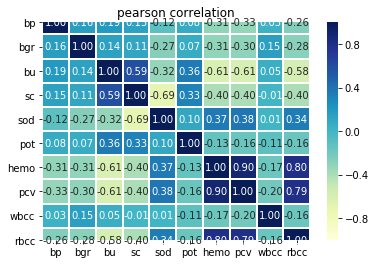

In [30]:
corr_matrix = Base_df[numerical_col].copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=1)
plt.title("pearson correlation")

### High correlation between 
* hemo & PCV 
* hemo & rbcc
* PCV & rbcc

## Checking correlation of these variables with target

In [31]:
Base_df[['pcv','hemo','rbcc','class_num']].corr()['class_num'][:]

pcv         -0.741427
hemo        -0.768919
rbcc        -0.699089
class_num    1.000000
Name: class_num, dtype: float64

## Conclusion - Hemo is most highly correlated, hence we can drop PCV and RBCC
## Confirming the above conclusion through Anova test

## Performing Anova test to identify the relationship between categorical target and numerical variables

In [32]:
for i in numerical_col:
    DFGroupLists=train.groupby('class')[i].apply(list)

    # Performing the ANOVA test
    # We accept the Assumption(H0) only when P-Value &gt; 0.05
    AnovaResults = f_oneway(*DFGroupLists)
    print(Attributes_Description[i])
    print('P-Value for Anova is: ', AnovaResults[1])
    print('-'*100)

blood pressure
P-Value for Anova is:  1.1804014516016069e-06
----------------------------------------------------------------------------------------------------
blood glucose random
P-Value for Anova is:  2.6165162777464684e-11
----------------------------------------------------------------------------------------------------
blood urea
P-Value for Anova is:  8.507542315005493e-10
----------------------------------------------------------------------------------------------------
serum creatinine
P-Value for Anova is:  4.3657542435384995e-07
----------------------------------------------------------------------------------------------------
sodium
P-Value for Anova is:  1.0278243345856477e-08
----------------------------------------------------------------------------------------------------
potassium
P-Value for Anova is:  0.1325737156077475
----------------------------------------------------------------------------------------------------
hemoglobin
P-Value for Anova is:  6.849725

## Dropping highly correlated variables

In [33]:
drop_features = ['pcv','rbcc']
Selected_features = [x for x in train.columns if (x not in Target_cols) and x not in drop_features]

train.drop(drop_features,axis=1,inplace = True)
test.drop(drop_features,axis=1,inplace = True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Checking feature importance from Anova and Lasso

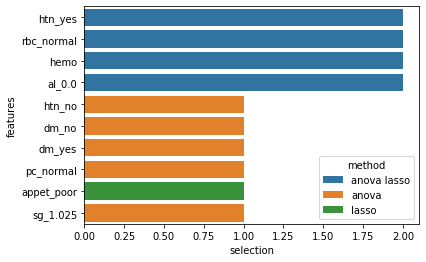

In [34]:
X = train.drop(Target_cols, axis=1).values
y = train["class_num"].values
feature_names = train.drop(Target_cols, axis=1).columns
## Anova
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k=10).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=10).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
 
## Plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False)[0:10], dodge=False)



## Features Importance using random forest

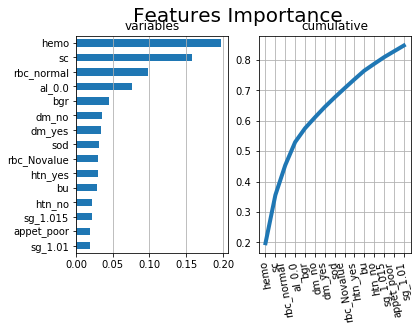

In [35]:
X = train.drop(Target_cols, axis=1).values
y = train["class_num"].values
feature_names = train.drop(Target_cols, axis=1).columns
## Importance

model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,"VARIABLE":feature_names}).sort_values("IMPORTANCE",ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]][0:15].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]][0:15].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances[0:15])), 
          xticklabels=dtf_importances.index[0:15])
plt.xticks(rotation=100)
plt.grid(axis='both')
plt.show()

In [36]:

X_train = train[Selected_features].values
y_train = train[Target].values
X_test = test[Selected_features].values
y_test = test[Target].values

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


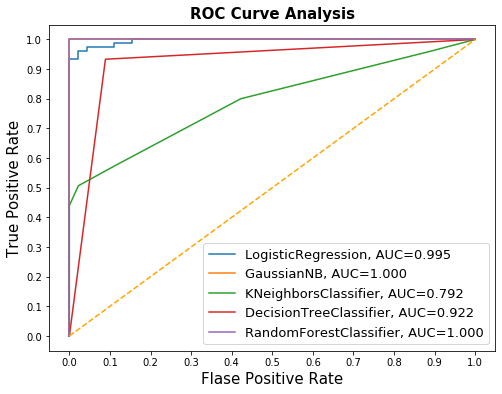

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score


classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB()
               ,KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [38]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
Y_pred_prob = logreg.predict_proba(X_test)[::,1]
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


98.21

In [39]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

62.5

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

86.43

In [41]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

98.93

In [42]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

37.5

In [43]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


62.5

In [44]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

62.5

The model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [45]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

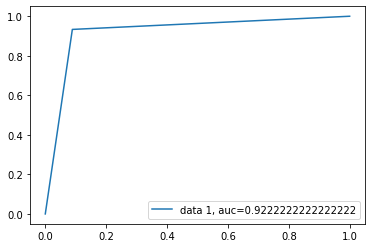

In [46]:
import sklearn
Y_pred_prob = decision_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,Y_pred)
auc = sklearn.metrics.roc_auc_score(y_test, Y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [47]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

Feature: bp, Score: 0.00739
Feature: bgr, Score: 0.04888
Feature: bu, Score: 0.02681
Feature: sc, Score: 0.07984
Feature: sod, Score: 0.04178
Feature: pot, Score: 0.00670
Feature: hemo, Score: 0.24552
Feature: wbcc, Score: 0.00748
Feature: sg_1.005, Score: 0.00000
Feature: sg_1.01, Score: 0.00911
Feature: sg_1.015, Score: 0.02453
Feature: sg_1.02, Score: 0.01361
Feature: sg_1.025, Score: 0.02812
Feature: sg_Novalue, Score: 0.00161
Feature: al_0.0, Score: 0.07997
Feature: al_1.0, Score: 0.00361
Feature: al_2.0, Score: 0.00172
Feature: al_3.0, Score: 0.00236
Feature: al_4.0, Score: 0.00064
Feature: al_5.0, Score: 0.00000
Feature: su_0.0, Score: 0.00341
Feature: su_1.0, Score: 0.00009
Feature: su_2.0, Score: 0.00013
Feature: su_3.0, Score: 0.00000
Feature: su_4.0, Score: 0.00000
Feature: su_5.0, Score: 0.00000
Feature: rbc_Novalue, Score: 0.03068
Feature: rbc_abnormal, Score: 0.00158
Feature: rbc_normal, Score: 0.13260
Feature: pc_Novalue, Score: 0.00534
Feature: pc_abnormal, Score: 0.003

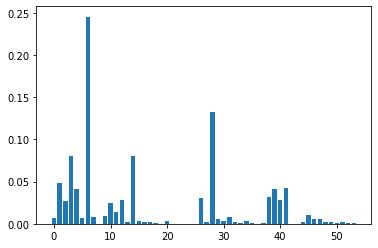

In [48]:
from matplotlib import pyplot
importance = random_forest.feature_importances_
# summarize feature importance
for i,v in (dict(zip(train[Selected_features].columns,importance))).items():
    print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

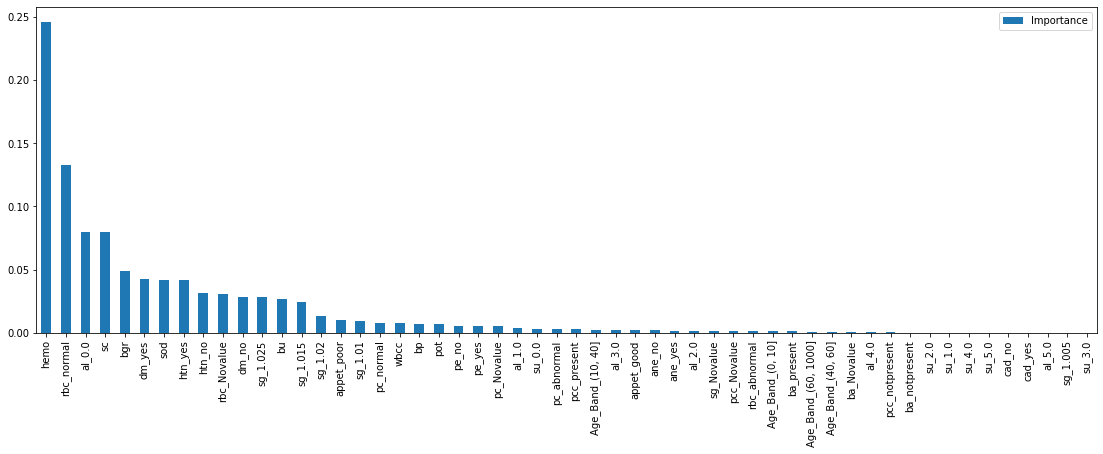

In [49]:
feat_importances = pd.DataFrame(random_forest.feature_importances_, index=train[Selected_features].columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(19,6))

In [50]:
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances['cumulative_weight'] = pd.Series(["{0:.2f}%".format(val * 100) for val in feat_importances.Importance.cumsum()], index = feat_importances.index)

feat_importances

,Importance,cumulative_weight
hemo,0.245520,24.55%
rbc_normal,0.132598,37.81%
al_0.0,0.079974,45.81%
sc,0.079843,53.79%
bgr,0.048881,58.68%
dm_yes,0.042560,62.94%
sod,0.041776,67.12%
htn_yes,0.041615,71.28%
htn_no,0.031895,74.47%
rbc_Novalue,0.030680,77.53%


In [51]:
feat_importances.to_csv('Feature_Importance_random_f.csv',index=False)

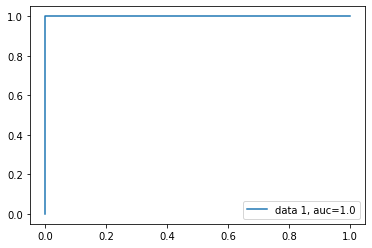

In [52]:

Y_pred_prob = random_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,Y_pred)
auc = sklearn.metrics.roc_auc_score(y_test, Y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Confusion Matrix 
 [[45  0]
 [ 0 75]]
Total Notckd or N:              45
Total ckd or P:                  75
Total Notckd Predicted or N^:   45
Total ckd Predicted or P^:       75


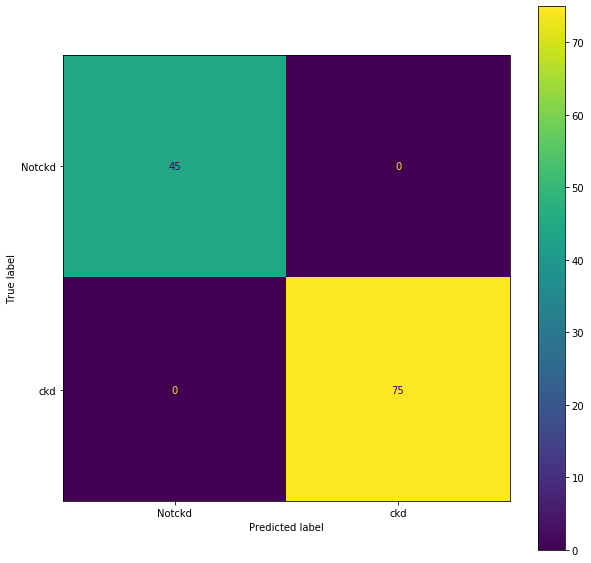

In [53]:
rcParams['figure.figsize'] = 10,10
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted = random_forest.predict(X_test)
cm = confusion_matrix(y_test, predicted)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Notckd','ckd'])
print('Confusion Matrix \n',cm)
print('Total Notckd or N:             ' ,cm[0].sum())
print('Total ckd or P:                 ',cm[1].sum())
print('Total Notckd Predicted or N^:  ' ,cm[0][0]+cm[1][0])
print('Total ckd Predicted or P^:      ',cm[0][1]+cm[1][1])
cmd.plot()


In [54]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
4,Naive Bayes,98.93
2,Logistic Regression,98.21
1,KNN,86.43
0,Support Vector Machines,62.50
6,Stochastic Gradient Decent,62.50
7,Linear SVC,62.50
5,Perceptron,37.50


----------------------------------------------------------------------------------------------------
LogisticRegression()
Confusion Matrix 
 [[43  2]
 [ 2 73]]
Total Notckd or N:              45
Total ckd or P:                  75
Total Notckd Predicted or N^:   45
Total ckd Predicted or P^:       75
----------------------------------------------------------------------------------------------------
Recall (all 1s predicted right): 0.97
Precision (confidence when predicting a 1): 0.97
Detail:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.97      0.97      0.97        75

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120

----------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.7/si

----------------------------------------------------------------------------------------------------
Recall (all 1s predicted right): 0.93
Precision (confidence when predicting a 1): 0.95
Detail:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.95      0.93      0.94        75

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
RandomForestClassifier()
Confusion Matrix 
 [[45  0]
 [ 0 75]]
Total Notckd or N:              45
Total ckd or P:                  75
Total Notckd Predicted or N^:   45
Total

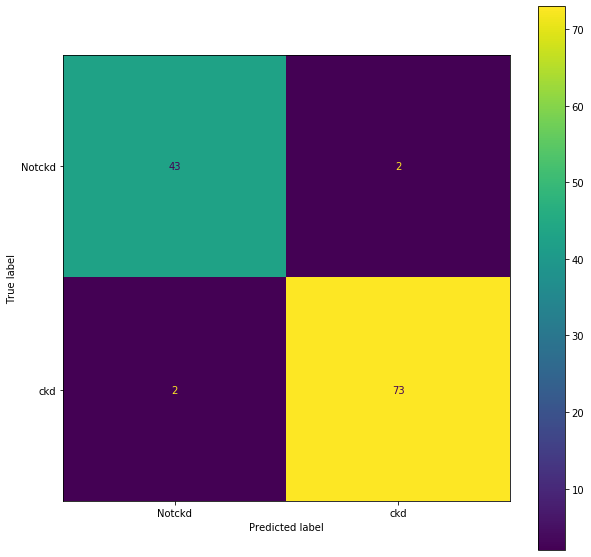

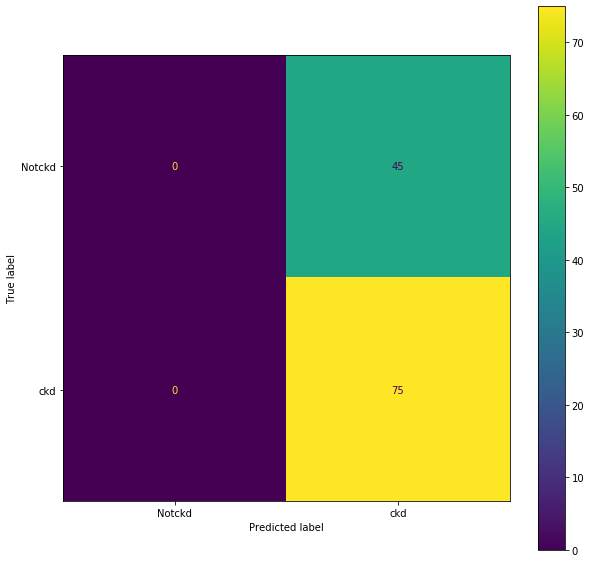

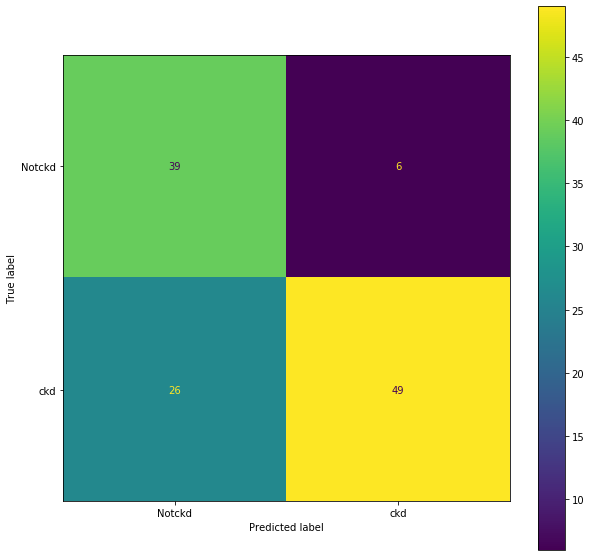

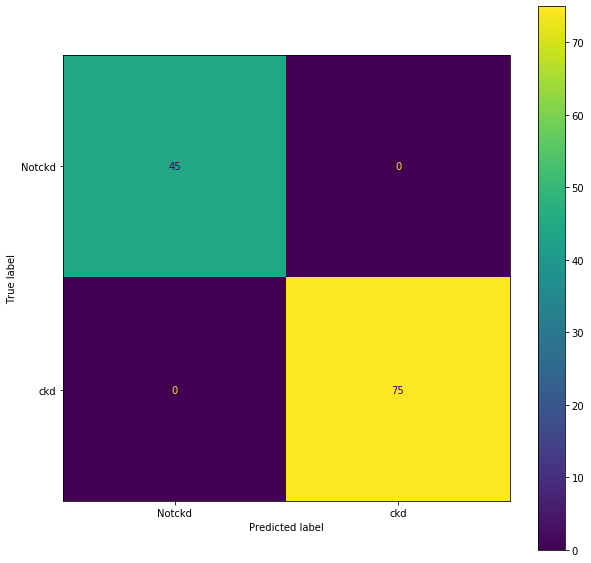

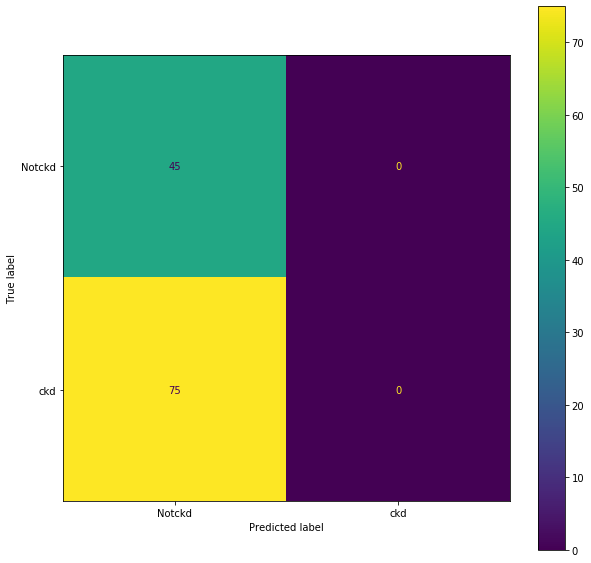

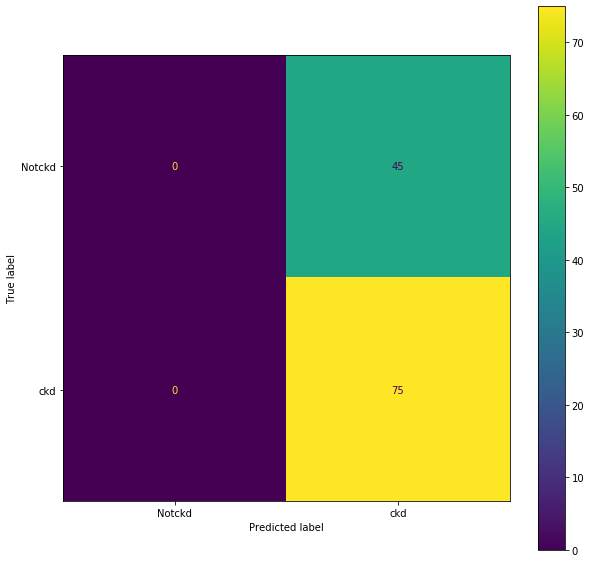

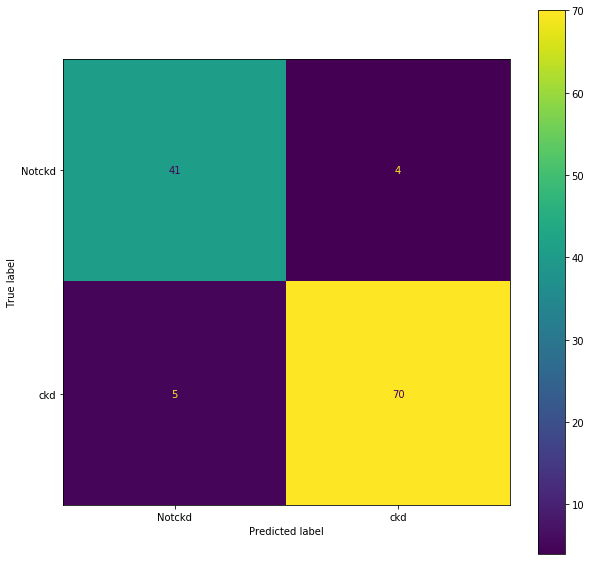

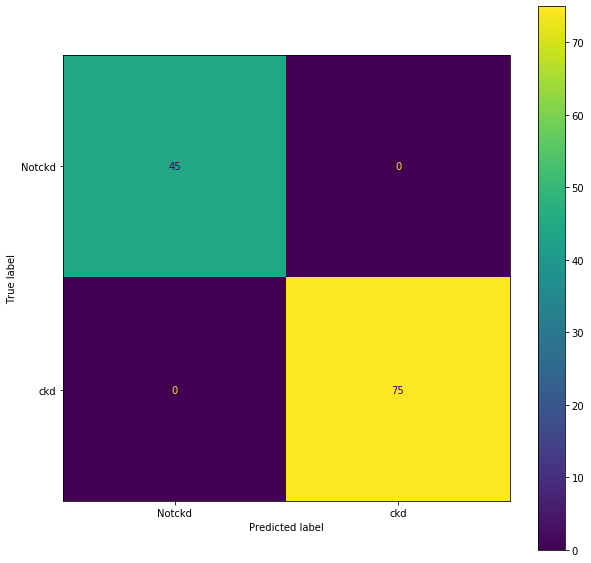

In [55]:
rcParams['figure.figsize'] = 10,10
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model in [logreg,svc,knn,gaussian,perceptron,linear_svc,decision_tree,random_forest]:
    print('-'*100)
    print(model)
    predicted = model.predict(X_test)
    cm = confusion_matrix(y_test, predicted)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Notckd','ckd'])
    print('Confusion Matrix \n',cm)
    print('Total Notckd or N:             ' ,cm[0].sum())
    print('Total ckd or P:                 ',cm[1].sum())
    print('Total Notckd Predicted or N^:  ' ,cm[0][0]+cm[1][0])
    print('Total ckd Predicted or P^:      ',cm[0][1]+cm[1][1])
    cmd.plot()
    print('-'*100)
    accuracy = metrics.accuracy_score(y_test, predicted)
    ## Precision e Recall
    recall = metrics.recall_score(y_test, predicted)
    precision = metrics.precision_score(y_test, predicted)
    print("Recall (all 1s predicted right):", round(recall,2))
    print("Precision (confidence when predicting a 1):", round(precision,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))
    print('-'*100)
    print('-'*100)